In [1]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# command line argument
ap = argparse.ArgumentParser()
ap.add_argument("--mode",help="train/display")
mode = ap.parse_args().mode

In [2]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

# Define data generators
train_dir = "Training"
val_dir = 'data/test'

num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 50

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [4]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')



Found 28709 images belonging to 7 classes.


In [5]:
val_dir = 'test'

In [6]:
val_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 7180 images belonging to 7 classes.


In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [9]:
if model == "train":
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
    model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)
    plot_model_history(model_info)
    model.save_weights('model.h5')

In [10]:
mode="train"

Epoch 1/50


C:\Users\AgasMsi\AppData\Local\Temp\ipykernel_13176\1589608585.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info = model.fit_generator(


448/448 [==============================] - 173s 380ms/step - loss: 1.7320 - accuracy: 0.2932 - val_loss: 1.5291 - val_accuracy: 0.4067
Epoch 2/50
448/448 [==============================] - 170s 379ms/step - loss: 1.4545 - accuracy: 0.4382 - val_loss: 1.3025 - val_accuracy: 0.5000
Epoch 3/50
448/448 [==============================] - 170s 380ms/step - loss: 1.3154 - accuracy: 0.4941 - val_loss: 1.2411 - val_accuracy: 0.5232
Epoch 4/50
448/448 [==============================] - 170s 380ms/step - loss: 1.2361 - accuracy: 0.5261 - val_loss: 1.1761 - val_accuracy: 0.5490
Epoch 5/50
448/448 [==============================] - 171s 381ms/step - loss: 1.1839 - accuracy: 0.5495 - val_loss: 1.1587 - val_accuracy: 0.5527
Epoch 6/50
448/448 [==============================] - 172s 385ms/step - loss: 1.1411 - accuracy: 0.5650 - val_loss: 1.1177 - val_accuracy: 0.5713
Epoch 7/50
448/448 [==============================] - 170s 380ms/step - loss: 1.0911 - accuracy: 0.5838 - val_loss: 1.0906 - val_accura

TypeError: 5.0 must be a sequence

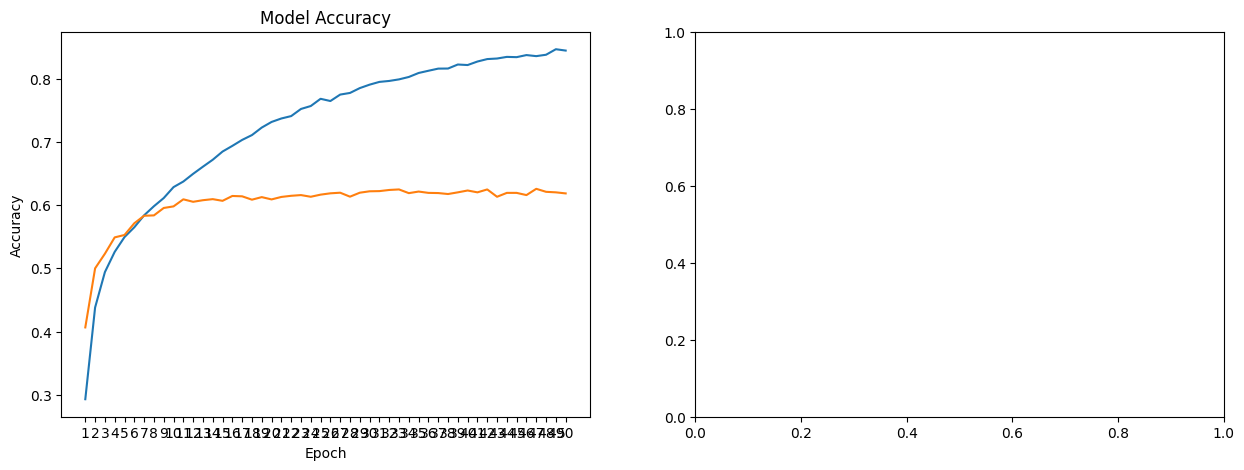

In [11]:
if mode == "train":
    model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
    model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)
    plot_model_history(model_info)
    model.save_weights("model10.h5")

# emotions will be displayed on your face from the webcam feed


In [12]:
model.save_weights("model10.h5")


1/1 [==============================] - 0s 22ms/step


KeyboardInterrupt: 

KeyboardInterrupt: 

In [9]:
from PIL import ImageFont, ImageDraw, Image  
model.load_weights('model10.h5')

    # prevents openCL usage and unnecessary logging messages
cv2.ocl.setUseOpenCL(False)

    # dictionary which assigns each label an emotion (alphabetical order)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

    # start the webcam feed
cap = cv2.VideoCapture(0)
while True:
        # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        x1=x
        y1=y
        w1=w
        h1=h
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        
        font_color = (0, 0, 0)
        for x in emotion_dict.keys():
            if maxindex == 0:
                font_color = (0,256, 0) 
            if maxindex == 1: 
                font_color = (0,0,0) 
            if maxindex == 2: 
                font_color = (19, 139,69) 
            if maxindex==3:
                font_color = (255, 0, 0) 
            if maxindex==4: 
                font_color = (32, 218,165) 
            if maxindex == 5: 
                font_color = (0, 0,100) 
            if maxindex == 6: 
                font_color = (128, 0,128)  
#         font = ImageFont.truetype("arial.ttf", 15) 
        cv2.rectangle(frame, (x1, y1-50), (x1+w1, y1+h1+10), font_color, 2)
        cv2.putText(frame, emotion_dict[maxindex], (x1+20, y1-60), cv2.FONT_HERSHEY_SIMPLEX, 1, font_color, 2, cv2.LINE_AA)

        
        
    cv2.imshow('Video', cv2.resize(frame,(1080  ,864),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 22ms/step


KeyboardInterrupt: 